<a href="https://colab.research.google.com/github/THANNAGA/generalized_Lotka_Volterra_Interactive_Activation/blob/main/gLIA_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torchdiffeq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchdiffeq import odeint_adjoint as odeint
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random

In [4]:
# --- Word List (1,000 words) ---
full_wordlist = [
    "the", "of", "to", "and", "a", "in", "is", "it", "you", "that",
    "he", "was", "for", "on", "are", "with", "as", "I", "his", "they",
    "be", "at", "one", "have", "this", "from", "or", "had", "by", "not",
    "word", "but", "what", "some", "we", "can", "out", "other", "were", "all",
    "there", "when", "up", "use", "your", "how", "said", "an", "each", "she",
    "which", "do", "their", "time", "if", "will", "way", "about", "many", "then",
    "them", "write", "would", "like", "so", "these", "her", "long", "make", "thing",
    "see", "him", "two", "has", "look", "more", "day", "could", "go", "come",
    "did", "number", "sound", "no", "most", "people", "my", "over", "know", "water",
    "than", "call", "first", "who", "may", "down", "side", "been", "now", "find",
    "any", "new", "work", "part", "take", "get", "place", "made", "live", "where",
    "after", "back", "little", "only", "round", "man", "year", "came", "show", "every",
    "good", "me", "give", "our", "under", "name", "very", "through", "just", "form",
    "sentence", "great", "think", "say", "help", "low", "line", "differ", "turn", "cause",
    "much", "mean", "before", "move", "right", "boy", "old", "too", "same", "tell",
    "does", "set", "three", "want", "air", "well", "also", "play", "small", "end",
    "put", "home", "read", "hand", "port", "large", "spell", "add", "even", "land",
    "here", "must", "big", "high", "such", "follow", "act", "why", "ask", "men",
    "change", "went", "light", "kind", "off", "need", "house", "picture", "try", "us",
    "again", "animal", "point", "mother", "world", "near", "build", "self", "earth", "father",
    "head", "stand", "own", "page", "should", "country", "found", "answer", "school", "grow",
    "study", "still", "learn", "plant", "cover", "food", "sun", "four", "between", "state",
    "keep", "eye", "never", "last", "let", "thought", "city", "tree", "cross", "farm",
    "hard", "start", "might", "story", "saw", "far", "sea", "draw", "left", "late",
    "run", "dont", "while", "press", "close", "night", "real", "life", "few", "north",
    "open", "seem", "together", "next", "white", "children", "begin", "got", "walk", "example",
    "ease", "paper", "group", "always", "music", "those", "both", "mark", "often", "letter",
    "until", "mile", "river", "car", "feet", "care", "second", "book", "carry", "took",
    "science", "eat", "room", "friend", "began", "idea", "fish", "mountain", "stop", "once",
    "base", "hear", "horse", "cut", "sure", "watch", "color", "face", "wood", "main",
    "enough", "plain", "girl", "usual", "young", "ready", "above", "ever", "red", "list",
    "though", "feel", "talk", "bird", "soon", "body", "dog", "family", "direct", "pose",
    "leave", "song", "measure", "door", "product", "black", "short", "numeral", "class", "wind",
    "question", "happen", "complete", "ship", "area", "half", "rock", "order", "fire", "south",
    "problem", "piece", "told", "knew", "pass", "since", "top", "whole", "king", "space",
    "heard", "best", "hour", "better", "true", "during", "hundred", "five", "remember", "step",
    "early", "hold", "west", "ground", "interest", "reach", "fast", "verb", "sing", "listen",
    "six", "table", "travel", "less", "morning", "ten", "simple", "several", "vowel", "toward",
    "war", "lay", "against", "pattern", "slow", "center", "love", "person", "money", "serve",
    "appear", "road", "map", "rain", "rule", "govern", "pull", "cold", "notice", "voice",
    "unit", "power", "town", "fine", "certain", "fly", "fall", "lead", "cry", "dark",
    "machine", "note", "wait", "plan", "figure", "star", "box", "noun", "field", "rest",
    "correct", "able", "pound", "done", "beauty", "drive", "stood", "contain", "front", "teach",
    "week", "final", "gave", "green", "oh", "quick", "develop", "ocean", "warm", "free",
    "minute", "strong", "special", "mind", "behind", "clear", "tail", "produce", "fact", "street",
    "inch", "multiply", "nothing", "course", "stay", "wheel", "full", "force", "blue", "object",
    "decide", "surface", "deep", "moon", "island", "foot", "system", "busy", "test", "record",
    "boat", "common", "gold", "possible", "plane", "stead", "dry", "wonder", "laugh", "thousand",
    "ago", "ran", "check", "game", "shape", "equate", "hot", "miss", "brought", "heat",
    "snow", "tire", "bring", "yes", "distant", "fill", "east", "paint", "language", "among",
    "grand", "ball", "yet", "wave", "drop", "heart", "am", "present", "heavy", "dance",
    "engine", "position", "arm", "wide", "sail", "material", "size", "vary", "settle", "speak",
    "weight", "general", "ice", "matter", "circle", "pair", "include", "divide", "syllable", "felt",
    "perhaps", "pick", "sudden", "count", "square", "reason", "length", "represent", "art", "subject",
    "region", "energy", "hunt", "probable", "bed", "brother", "egg", "ride", "cell", "believe",
    "fraction", "forest", "sit", "race", "window", "store", "summer", "train", "sleep", "prove",
    "lone", "leg", "exercise", "wall", "catch", "mount", "wish", "sky", "board", "joy",
    "winter", "sat", "written", "wild", "instrument", "kept", "glass", "grass", "cow", "job",
    "edge", "sign", "visit", "past", "soft", "fun", "bright", "gas", "weather", "month",
    "million", "bear", "finish", "happy", "hope", "flower", "clothe", "strange", "gone", "jump",
    "baby", "eight", "village", "meet", "root", "buy", "raise", "solve", "metal", "whether",
    "push", "seven", "paragraph", "third", "shall", "held", "hair", "describe", "cook", "floor",
    "either", "result", "burn", "hill", "safe", "cat", "century", "consider", "type", "law",
    "bit", "coast", "copy", "phrase", "silent", "tall", "sand", "soil", "roll", "temperature",
    "finger", "industry", "value", "fight", "lie", "beat", "excite", "natural", "view", "sense",
    "ear", "else", "quite", "broke", "case", "middle", "kill", "son", "lake", "moment",
    "scale", "loud", "spring", "observe", "child", "straight", "consonant", "nation", " Refresh", "milk",
    "speed", "method", "organ", "pay", "age", "section", "dress", "cloud", "surprise", "quiet",
    "stone", "tiny", "climb", "cool", "design", "poor", "lot", "experiment", "bottom", "key",
    "iron", "single", "stick", "flat", "twenty", "skin", "smile", "crease", "hole", "trade",
    "melody", "trip", "office", "receive", "row", "mouth", "exact", "symbol", "die", "least",
    "trouble", "shout", "except", "wrote", "seed", "tone", "join", "suggest", "clean", "break",
    "lady", "yard", "rise", "bad", "blow", "oil", "blood", "touch", "grew", "cent",
    "mix", "team", "wire", "cost", "lost", "brown", "wear", "garden", "equal", "sent",
    "choose", "fell", "fit", "flow", "fair", "bank", "collect", "save", "control", "decimal",
    "gentle", "woman", "captain", "practice", "separate", "difficult", "doctor", "please", "protect", "noon",
    "whose", "locate", "ring", "character", "insect", "caught", "period", "indicate", "radio", "spoke",
    "atom", "human", "history", "effect", "electric", "expect", "crop", "modern", "element", "hit",
    "student", "corner", "party", "supply", "bone", "rail", "imagine", "provide", "agree", "thus",
    "capital", "wont", "chair", "danger", "fruit", "rich", "thick", "soldier", "process", "operate",
    "guess", "necessary", "sharp", "wing", "create", "neighbor", "wash", "bat", "rather", "crowd",
    "corn", "compare", "poem", "string", "bell", "depend", "meat", "rub", "tube", "famous",
    "dollar", "stream", "fear", "sight", "thin", "triangle", "planet", "hurry", "chief", "colony",
    "clock", "mine", "tie", "enter", "major", "fresh", "search", "send", "yellow", "gun",
    "allow", "print", "dead", "spot", "desert", "suit", "current", "lift", "rose", "continue",
    "block", "chart", "hat", "sell", "success", "company", "subtract", "event", "particular", "deal",
    "swim", "term", "opposite", "wife", "shoe", "shoulder", "spread", "arrange", "camp", "invent",
    "cotton", "born", "determine", "quart", "nine", "truck", "noise", "level", "chance", "gather",
    "shop", "stretch", "throw", "shine", "property", "column", "molecule", "select", "wrong", "gray",
    "repeat", "require", "broad", "prepare", "salt", "nose", "plural", "anger", "claim", "continent",
    "oxygen", "sugar", "death", "pretty", "skill", "women", "season", "solution", "magnet", "silver",
    "thank", "branch", "match", "suffix", "especially", "fig", "afraid", "huge", "sister", "steel",
    "discuss", "forward", "similar", "guide", "experience", "score", "apple", "bought", "led", "pitch",
    "coat", "mass", "card", "band", "rope", "slip", "win", "dream", "evening", "condition",
    "feed", "tool", "total", "basic", "smell", "valley", "nor", "double", "seat", "arrive",
    "master", "track", "parent", "shore", "division", "sheet", "substance", "favor", "connect", "post",
    "spend", "chord", "fat", "glad", "original", "share", "station", "dad", "bread", "charge",
    "proper", "bar", "offer", "segment", "slave", "duck", "instant", "market", "degree", "populate",
    "chick", "dear", "enemy", "reply", "drink", "occur", "support", "speech", "nature", "range",
    "steam", "motion", "path", "liquid", "log", "meant", "quotient", "teeth", "shell", "neck"
]


Generating tiny synthetic dataset with 100 words...
Visualizing a few synthetic samples...


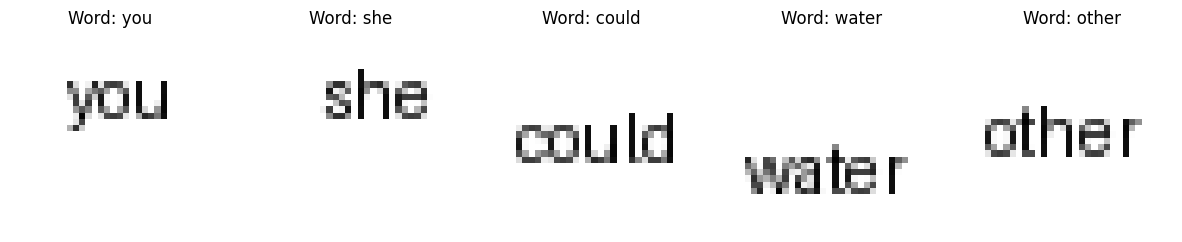

Training Neural ODE Model...
Epoch [1/100], Loss: 4.6424, Accuracy: 1.00%
Epoch [2/100], Loss: 4.5071, Accuracy: 5.00%
Epoch [3/100], Loss: 4.3296, Accuracy: 3.60%
Epoch [4/100], Loss: 4.0845, Accuracy: 7.30%
Epoch [5/100], Loss: 3.7159, Accuracy: 19.70%
Epoch [6/100], Loss: 3.2332, Accuracy: 27.80%
Epoch [7/100], Loss: 2.7346, Accuracy: 39.50%
Epoch [8/100], Loss: 2.2087, Accuracy: 48.80%
Epoch [9/100], Loss: 1.7588, Accuracy: 58.30%
Epoch [10/100], Loss: 1.3635, Accuracy: 68.80%
Epoch [11/100], Loss: 0.9995, Accuracy: 76.30%
Epoch [12/100], Loss: 0.6845, Accuracy: 85.90%
Epoch [13/100], Loss: 0.4679, Accuracy: 91.20%
Epoch [14/100], Loss: 0.3065, Accuracy: 94.80%
Epoch [15/100], Loss: 0.2146, Accuracy: 97.10%
Epoch [16/100], Loss: 0.1452, Accuracy: 97.80%
Epoch [17/100], Loss: 0.1022, Accuracy: 98.40%
Epoch [18/100], Loss: 0.0692, Accuracy: 99.20%
Epoch [19/100], Loss: 0.0480, Accuracy: 99.40%
Epoch [20/100], Loss: 0.0334, Accuracy: 99.70%
Epoch [21/100], Loss: 0.0261, Accuracy: 99.7

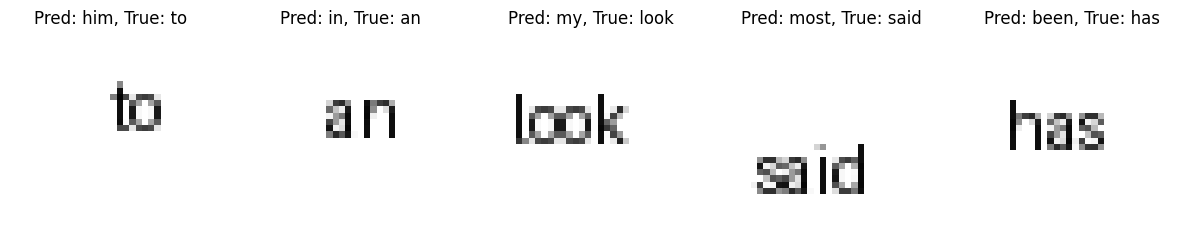

The weight matrix is NOT negative definite, making it so...
Plotting time evolution for one example (Neural ODE)...


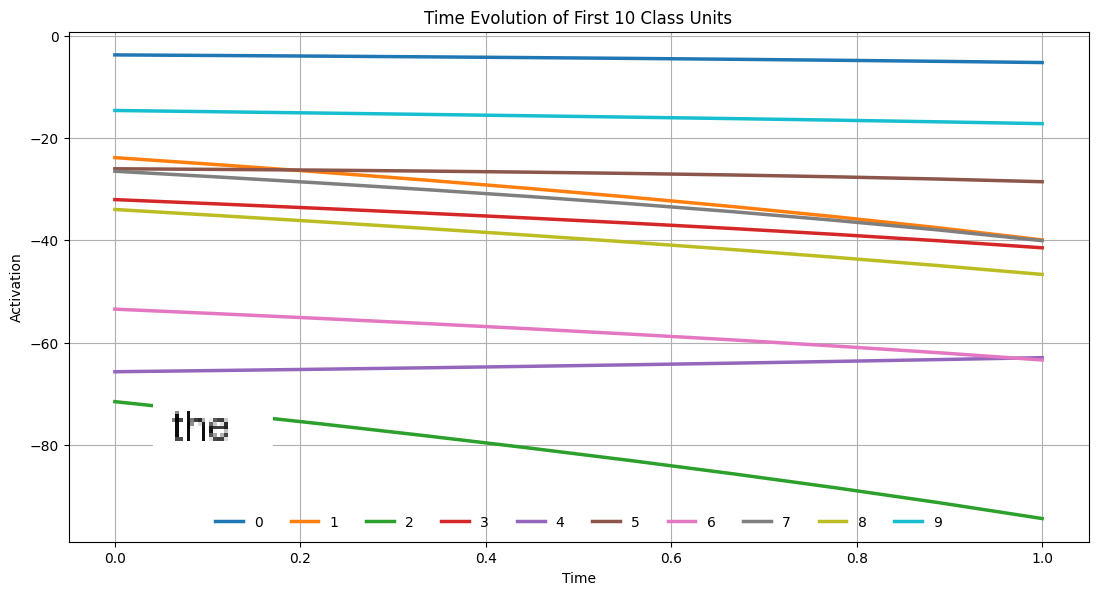

Visualization complete!


In [7]:
# Set random seed and device
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Hyperparameters ---
input_channels = 3
k = 128#512#246
batch_size = 128
learning_rate = 0.001  # Try 0.01 or 0.0001 if needed
num_epochs = 100
t = torch.linspace(0., 1., 10).to(device)

# Scalable parameter
num_words = 100  # Start with 10 words; change to 100 or 1000 later
hidden_dim = k + num_words
output_dim = num_words

# --- Tiny Synthetic Dataset ---
class TinySynthWordDataset(Dataset):
    def __init__(self, word_list, num_words, exemplars_per_word=10, transform=None):
        self.transform = transform
        self.exemplars_per_word = exemplars_per_word
        self.words = word_list[:num_words]
        self.label_map = {word: idx for idx, word in enumerate(self.words)}
        self.images = []
        self.labels = []
        print(f"Generating tiny synthetic dataset with {num_words} words...")
        for word in self.words:
            for _ in range(exemplars_per_word):
                img = self._generate_word_image(word)
                self.images.append(img)
                self.labels.append(self.label_map[word])
        self.images = torch.stack(self.images)

    def _generate_word_image(self, word):
        img = Image.new('L', (32, 32), color=255)
        draw = ImageDraw.Draw(img)
        try:
            font = ImageFont.load_default()
        except:
            font = None
        text_size = draw.textlength(word, font=font) if font else len(word) * 6
        x = random.randint(2, max(2, 32 - int(text_size) - 2))
        y = random.randint(2, 20)
        draw.text((x, y), word, fill=0, font=font)
        return transforms.ToTensor()(img)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

# --- Transforms ---
transform = transforms.Compose([
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# --- Load Dataset ---
dataset = TinySynthWordDataset(full_wordlist, num_words=num_words, exemplars_per_word=10, transform=transform)
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# --- Visualize Samples ---
def visualize_samples(loader, dataset, predicted=None):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    index_to_word = {idx: word for word, idx in dataset.label_map.items()}
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        img = images[i].permute(1, 2, 0).numpy()
        img = (img * 0.5) + 0.5
        true_word = index_to_word[labels[i].item()]
        if predicted is not None:
            pred_word = index_to_word[predicted[i].item()]
            title = f"Pred: {pred_word}, True: {true_word}"
        else:
            title = f"Word: {true_word}"
        axes[i].imshow(img)
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.show()

# Example usage after dataset and loader are defined:
print("Visualizing a few synthetic samples...")
visualize_samples(train_loader, dataset)

# --- Model Components ---
def make_negative_definite(matrix):
    eigvals, eigvecs = torch.linalg.eigh(matrix)
    neg_eigvals = torch.clamp(eigvals, max=0)
    return eigvecs @ torch.diag(neg_eigvals) @ eigvecs.T

class ConvNetEncoder(nn.Module):
    def __init__(self, k):
        super(ConvNetEncoder, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Linear(8 * 8 * 32, k)

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

class gLV_ODE(nn.Module):
    def __init__(self, n):
        super(gLV_ODE, self).__init__()
        self.n = n
        epsilon = 0.0001  # Increased from 0.0001 for stronger dynamics
        #self.A = epsilon * nn.Parameter(torch.ones(n, n)).to(device)
        self.A = epsilon * nn.Parameter(torch.randn(n, n)).to(device)
        self.A.data = make_negative_definite(self.A.data)
        #self.A.data[:n-num_words, n-num_words:] = epsilon * torch.randn(n-num_words, num_words).to(device)
        #self.A.data[n-num_words:, :n-num_words] = self.A.data[:n-num_words, n-num_words:].t()
        #self.A.data[n-num_words:, n-num_words:] = epsilon * make_negative_definite(torch.randn(num_words, num_words)).to(device)
        self.r = nn.Parameter(epsilon * torch.ones(n)).to(device)

    def forward(self, t, x):
        interactions = torch.matmul(x, self.A)
        dx_dt = x * (self.r + interactions)
        return dx_dt

class NeuralODEClassifier(nn.Module):
    def __init__(self, hidden_dim, output_dim, k):
        super(NeuralODEClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.k = k
        self.encoder = ConvNetEncoder(k)
        self.ode_func = gLV_ODE(hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, t):
        h_k = self.encoder(x)
        h0 = 0.0001 * torch.ones(x.size(0), self.hidden_dim).to(x.device)
        h0[:, :self.k] = h_k
        ht = odeint(self.ode_func, h0, t, method='rk4')
        #out = self.output_layer(ht)
        out = ht[:, :, -output_dim:]
        return out

class SimpleCNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNNClassifier, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Linear(8 * 8 * 32, num_classes)

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# --- Training Function ---
def train(model, train_loader, optimizer, criterion, t=None, use_ode=False):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        if use_ode:
            outputs = model(images, t)
            loss = criterion(outputs[-1], labels)
        else:
            outputs = model(images)
            loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs[-1].data if use_ode else outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #if batch_idx % 10 == 0:  # Print every 10 batches to debug
        #    print(f"Batch {batch_idx}, Loss: {loss.item():.4f}")
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc

# --- Train Neural ODE ---
print("Training Neural ODE Model...")
model_ode = NeuralODEClassifier(hidden_dim, output_dim, k+output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer_ode = optim.Adam(model_ode.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    loss, acc = train(model_ode, train_loader, optimizer_ode, criterion, t, use_ode=True)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}, Accuracy: {acc:.2f}%")

# --- Train Baseline CNN ---
print("\nTraining Baseline CNN Model...")
model_cnn = SimpleCNNClassifier(num_words).to(device)
optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    loss, acc = train(model_cnn, train_loader, optimizer_cnn, criterion, use_ode=False)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}, Accuracy: {acc:.2f}%")

# --- Visualize Predictions (Neural ODE) ---
model_ode.eval()
with torch.no_grad():
    test_images, test_labels = next(iter(train_loader))
    test_images, test_labels = test_images.to(device), test_labels.to(device)
    outputs = model_ode(test_images, t)
    _, predicted = torch.max(outputs[-1].data, 1)
    print("Visualizing Neural ODE predictions...")
    visualize_samples(train_loader, dataset, predicted=predicted.cpu())

# --- Negative Definiteness (Neural ODE) ---
def is_negative_definite(matrix):
    eigvals, _ = torch.linalg.eigh(matrix)
    return all(eigvals <= 0)

A = model_ode.ode_func.A
if is_negative_definite(A):
    print("The weight matrix is negative definite.")
else:
    print("The weight matrix is NOT negative definite, making it so...")
    with torch.no_grad():
        model_ode.ode_func.A.data = make_negative_definite(model_ode.ode_func.A.data)
        if is_negative_definite(model_ode.ode_func.A):
            print("The weight matrix is now negative definite.")

# --- Time Evolution Plot (Neural ODE) ---
def plot_time_evolution(model, image, t):
    model.eval()
    with torch.no_grad():
        image = image.to(device).unsqueeze(0)
        out = model(image, t)
        out = out.squeeze(1)
        _, predicted = torch.max(out[-1].data, 0)
        T, C = out.shape
        T_linspace = torch.linspace(0., 1., T)
        fig = plt.figure(figsize=(12, 6))
        ax_main = fig.add_axes([0.1, 0.1, 0.85, 0.85])
        ax_inset = fig.add_axes([0.12, 0.15, 0.2, 0.2])
        colors = plt.get_cmap('tab10')
        for i in range(min(10, output_dim)):
            ax_main.plot(T_linspace.cpu(), out[:, i].cpu(), label=str(i), linewidth=2.5, color=colors(i))
        ax_main.set_xlabel('Time')
        ax_main.set_ylabel('Activation')
        ax_main.set_title(f'Time Evolution of First {min(10, output_dim)} Class Units')
        ax_main.legend(loc='lower center', frameon=False, ncol=min(10, output_dim))
        ax_main.grid(True)
        img = image.squeeze(0).permute(1, 2, 0).cpu().numpy()
        img = (img * 0.5) + 0.5
        ax_inset.imshow(img)
        ax_inset.axis('off')
        plt.show()

print("Plotting time evolution for one example (Neural ODE)...")
test_image, _ = dataset[1]
plot_time_evolution(model_ode, test_image, t)

print("Visualization complete!")